In [1]:
import numpy as np
import pandas as pd
import torch
import os
import time 
import copy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set(font_scale=1)

import importlib
import random 

/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


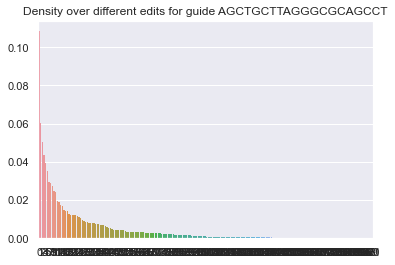

/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


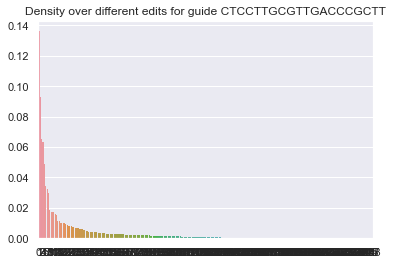

/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


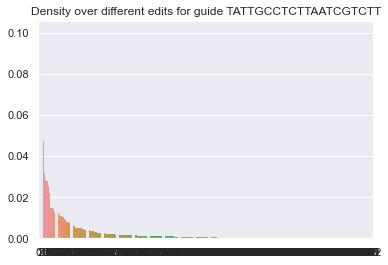

/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


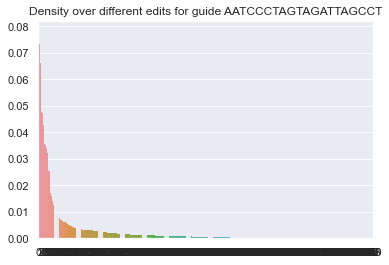

/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


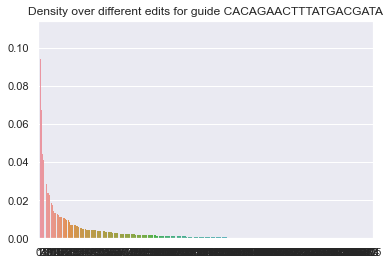

/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


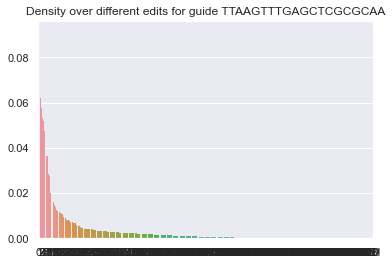

/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


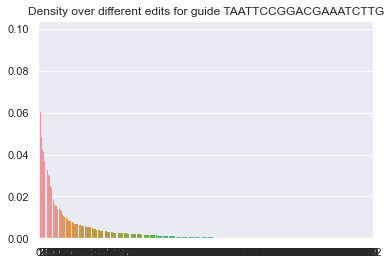

/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


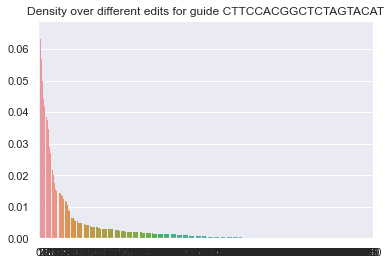

/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


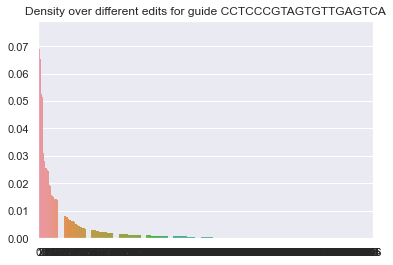

In [2]:
## How many cells does the real data end up with?
## Did this seed from one cell? 

import pickle
with open('d21_indel_distributions.p', 'rb') as f:
    indel_distributions = pickle.load(f)

slow_guides = ['AGCTGCTTAGGGCGCAGCCT', 'CTCCTTGCGTTGACCCGCTT', 'TATTGCCTCTTAATCGTCTT']
medium_guides = ['AATCCCTAGTAGATTAGCCT', 'CACAGAACTTTATGACGATA', 'TTAAGTTTGAGCTCGCGCAA']
fast_guides = ['TAATTCCGGACGAAATCTTG', 'CTTCCACGGCTCTAGTACAT', 'CCTCCCGTAGTGTTGAGTCA']


for li in [slow_guides, medium_guides, fast_guides]:
    for guide in li:
        dist = indel_distributions[guide]
        try:
            del dist['']
        except KeyError:
            pass
        distvals = np.array(sorted(list(dist.values()), reverse=True))
        distvals = distvals/distvals.sum()
        plt.figure()
        sns.barplot(np.arange(len(distvals)), distvals, linewidth=0)
        plt.title('Density over different edits for guide {0}'.format(guide))
        plt.show()
        plt.close()

# Estimate the mutation probability

# For a given site E_i[%] = E_{i-1}[%] + p(1-E_{i-1}[%])
# E_i = 1-q^i, where q = 1-p 
# Sanity check: 
# E_0 = 1-(1-p)^0 = 0 
# E_1 = 1-(1-p) = p 

# We can choose to use a combination of varying speed guides 

# 4, 7, 14, 21 days -> 4 generations, 7 generations etc (24 hrs for cell cycle?)

# How many generations does 1 day correspond to?
# Slow guides:
slow = [0.09, 0.15, 0.29, 0.4]

# Medium guides
medium = [0.15, 0.35, 0.6, 0.75]

# Fast guides
fast = [0.75, 0.9, 0.95, 0.96]




In [3]:
speed = {'AGCTGCTTAGGGCGCAGCCT': 'slow',
         'CTCCTTGCGTTGACCCGCTT': 'slow',
         'TATTGCCTCTTAATCGTCTT': 'slow',
         'AATCCCTAGTAGATTAGCCT': 'medium',
         'CACAGAACTTTATGACGATA': 'medium',
         'TTAAGTTTGAGCTCGCGCAA': 'medium',
         'TAATTCCGGACGAAATCTTG': 'fast',
         'CTTCCACGGCTCTAGTACAT': 'fast',
         'CCTCCCGTAGTGTTGAGTCA': 'fast'
        }

In [4]:
gens = [4,7,14,21]
print('\nSlow')
p_avg = 0
for i, x in enumerate(slow):
    G = 1/gens[i]
    p = 1 - (1-x)**G
    p_avg += p
    print(p)
print("Avg")
print(p_avg/4)

print('\nMedium')
p_avg = 0
for i, x in enumerate(medium):
    G = 1/gens[i]
    p = 1 - (1-x)**G
    p_avg += p
    print(p)
print("Avg")
print(p_avg/4)

print('\nFast')
p_avg = 0
for i, x in enumerate(fast):
    G = 1/gens[i]
    p = 1 - (1-x)**G
    p_avg += p
    print(p)
print("Avg")
print(p_avg/4)    

""" 
Questions
1. tree or forest
2. are the rates based on isolating a clone or from a forest
3. yosef lab was a single tree?? no

try this instead: 
start with many roots (a forest)

reproduction rate varying / same ?vfr 

"""


Slow
0.02330188829047808
0.02294954933760507
0.02416678505263603
0.024031560532588148
Avg
0.02361244580332683

Medium
0.03981541059581217
0.05968505934696777
0.06335350204906998
0.0638822575463951
Avg
0.056684057384561254

Fast
0.2928932188134524
0.28031432699884795
0.19263617565013524
0.14211035031316765
Avg
0.22698851794390082


' \nQuestions\n1. tree or forest\n2. are the rates based on isolating a clone or from a forest\n3. yosef lab was a single tree?? no\n\ntry this instead: \nstart with many roots (a forest)\n\nreproduction rate varying / same ?vfr \n\n'

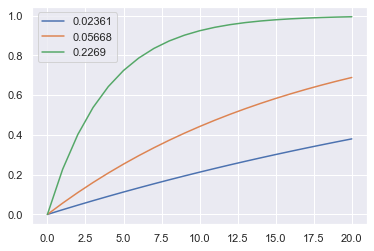

In [5]:
plt.figure()
for p in [0.02361, 0.05668, 0.2269]:
    q = 1-p
    plt.plot(np.arange(21), 1-q**np.arange(21), label=p)
plt.legend()
plt.show()
plt.close()

rate = {}
rate['slow'] = 0.02361
rate['medium'] = 0.05668
rate['fast'] = 0.2269

## Estimated parameters

## Simulate imbalanced trees

In [7]:
cassette_sites = ['AGCTGCTTAGGGCGCAGCCT',
                  'AATCCCTAGTAGATTAGCCT',
                  'TAATTCCGGACGAAATCTTG',
                  'CTCCTTGCGTTGACCCGCTT']

In [44]:
generate_cassettes(total_internal_nodes, 
                   cassette_sites)

Adding 0st/th site with speed slow
Adding 1st/th site with speed medium
Adding 2st/th site with speed fast
Adding 3st/th site with speed slow


[[0, 0, 48, 0],
 [0, 0, 0, 0],
 [0, 4, 0, 0],
 [0, 0, 0, 12],
 [0, 0, 37, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 99],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 11, 0],
 [0, 0, 169, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0]]

In [26]:
edits*(edit_happens < prob_edit).astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
simulation_list = []

for i, list_of_guides in enumerate(lists_of_guides):

    label = labels[i]
    print('Label:', label)

    # Each array has 3-6 targets, we insert ~10 arrays. This gives us 30-60 sites
    site_ix = 0
    target_distributions = {}
    speed = {}
    for guide in list_of_guides:
        dist = indel_distributions[guide]
        
        try:
            del dist['']
        except KeyError:
            pass
        
        distvals = np.array(sorted(list(dist.values()), reverse=True))
        distvals = distvals/distvals.sum()
        target_distributions[site_ix] = distvals
        
        if guide in slow_guides:
            speed[site_ix] = 'slow'
            
        elif guide in medium_guides:
            speed[site_ix] = 'medium'
            
        else:
            speed[site_ix] = 'fast'

        site_ix += 1

    num_targets = site_ix 
    num_edit_sites = num_targets * num_arrays

    import itertools
    targets = list(itertools.product(np.arange(num_arrays), np.arange(num_targets)))
    print('List of targets: ', targets)

    deletions = []
    mutation_probs = []
    for array, target in targets:
        deletions.append(target_distributions[target])
        mutation_probs.append(rate[speed[target]])
        
    deletions_probs = pd.DataFrame(deletions)
    deletions_probs = torch.DoubleTensor(deletions_probs.fillna(0.0).values)
    
    # Each edit site has a different mutation probability 
    mutation_probs= np.array(mutation_probs)

#     deletions_probs = deletions_probs[:, :100]
#     deletions_probs /= deletions_probs.sum(1, keepdims=True)
    
    edit_probs = np.hstack([mutation_probs.reshape(-1,1), (1-mutation_probs.reshape(-1,1))*deletions_probs.numpy()])
    
    break 


    
#     for init_cells in init_cell_list:

#         for run in range(num_runs):
            
#             try:
#                 simulation = lineageSimulationImbalanced(label, tree_depth, 
#                                                num_edit_sites, deletions_probs, 
#                                                mutation_probs, edit_probs, 
#                                                          init_cells=init_cells, 
#                                                          n_subsample=n_subsample,
#                                                          identify_recurrent_muts=False)
                
#                 simulation_list.append(simulation)
#                 assert False
#             except Exception as e:
#                 print(e)
#                 raise(e)

Label: smf
List of targets:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2), (3, 0), (3, 1), (3, 2), (4, 0), (4, 1), (4, 2), (5, 0), (5, 1), (5, 2), (6, 0), (6, 1), (6, 2), (7, 0), (7, 1), (7, 2), (8, 0), (8, 1), (8, 2), (9, 0), (9, 1), (9, 2)]


TypeError: No loop matching the specified signature and casting was found for ufunc true_divide

array([0.06435467, 0.0014301 , 0.03289238, 0.00196639, 0.00429031,
       0.00947444, 0.00196639, 0.00268144, 0.00053629, 0.00214516,
       0.01465856, 0.04218806, 0.01948516, 0.00089381, 0.00017876,
       0.00017876, 0.00035753, 0.00017876, 0.00840186, 0.10421881,
       0.06649982, 0.0048266 , 0.01519485, 0.00858062, 0.01072578,
       0.05988559, 0.00196639, 0.01018949, 0.01716124, 0.0096532 ,
       0.00017876, 0.00768681, 0.00196639, 0.0130497 , 0.04558455,
       0.00178763, 0.01144083, 0.00035753, 0.01251341, 0.0082231 ,
       0.00017876, 0.00017876, 0.00250268, 0.00643547, 0.00393279,
       0.00196639, 0.00214516, 0.00947444, 0.01340722, 0.00160887,
       0.00017876, 0.00160887, 0.0033965 , 0.00035753, 0.00017876,
       0.00053629, 0.01251341, 0.05470147, 0.0178763 , 0.02002145,
       0.01680372, 0.00732928, 0.00232392, 0.00804433, 0.00017876,
       0.0048266 , 0.00017876, 0.00017876, 0.00214516, 0.00017876,
       0.00786557, 0.00053629, 0.00035753, 0.0193064 , 0.00017

In [56]:
all_edits.tolist()

[[33,
  92,
  10,
  117,
  24,
  0,
  161,
  18,
  31,
  33,
  14,
  10,
  140,
  0,
  33,
  31,
  22,
  14,
  10,
  62,
  71,
  73,
  24,
  17,
  16,
  49,
  33,
  0,
  29,
  10],
 [92,
  299,
  165,
  153,
  44,
  54,
  297,
  58,
  3,
  15,
  7,
  42,
  2,
  44,
  45,
  165,
  109,
  186,
  66,
  51,
  51,
  77,
  5,
  44,
  6,
  342,
  65,
  77,
  6,
  6],
 [52,
  39,
  36,
  37,
  213,
  40,
  60,
  4,
  11,
  54,
  151,
  60,
  39,
  51,
  36,
  39,
  60,
  44,
  36,
  8,
  48,
  39,
  272,
  128,
  4,
  36,
  39,
  45,
  60,
  60],
 [130,
  104,
  30,
  1,
  49,
  43,
  40,
  43,
  51,
  40,
  41,
  30,
  1,
  54,
  30,
  1,
  30,
  41,
  0,
  227,
  50,
  1,
  40,
  29,
  51,
  49,
  32,
  0,
  153,
  123],
 [46,
  178,
  117,
  23,
  2,
  107,
  18,
  61,
  150,
  14,
  22,
  10,
  61,
  161,
  10,
  195,
  19,
  0,
  126,
  157,
  2,
  128,
  61,
  70,
  157,
  17,
  2,
  67,
  24,
  58],
 [4,
  49,
  44,
  41,
  58,
  7,
  58,
  64,
  58,
  44,
  2,
  42,
  6,
  22,
  119,
 

In [38]:
list(range(-1, len(pr)))

[-1, 0, 1, 2]

In [9]:
dist = indel_distributions[guide]

In [44]:
for site in cassette_sites:

    # Determine the probability of a CRISPR edit occurring during a generation
    prob_edit = rate[site]
    edit_happens = np.random.random(size=total_internal_nodes)

    # Now sample which edit occurs in each cell
    del_counts = indel_distributions[guide]['']
    del indel_distributions[guide]['']
    other_counts = list(indel_distributions[guide].values())

    counts = [del_counts] + other_counts
    counts = np.array(counts)
    counts /= counts.sum()
    
    edit_probs = counts/counts.sum()
    edits = np.random.choice(list(range(-1, len(edit_probs)-1)), size=total_internal_nodes, p=edit_probs)


NameError: name 'cassette' is not defined

In [24]:
mutation_happens < prob_mutations

array([[False, False, False],
       [ True,  True, False],
       [False, False, False],
       [ True, False, False],
       [ True, False, False]])

In [ ]:
np.random.choice()

In [11]:
def format_char_vec(a):
    nan_a = np.isnan(a)
    a = a.astype(np.int).astype(str)
    a[nan_a] = '-'
    return list(a)

for simulation in simulation_list:
    simulation.random_attr['missing_data_expt'] = {'frac':[],'cass':[],'ours':[],'base_score':[]}
    for frac in [0.05, 0.1, 0.2]:
        simulation.random_attr['missing_data_expt']['frac'].append(frac)
        
        priors = None

        cell_record = simulation.get_cell_record()
        # Randomly drop mutations to introduce missingness in data 
        prop = int(cell_record[-1].size * frac)
        #Randomly choose indices of the numpy array:
        i = [random.choice(range(cell_record[-1].shape[0])) for _ in range(prop)]
        j = [random.choice(range(cell_record[-1].shape[1])) for _ in range(prop)]

        cell_record[-1][i,j] = np.NaN
        
        # Modify true network to incorporate missing data 
        import networkx as nx
        from Cassiopeia.TreeSolver.Node import Node

        # Create networkx DiGraph to represent true_tree 
        tree = nx.DiGraph()
        
        # Create nodes representing the leaves
        level_ix = simulation.subsampled_ix
        record = cell_record[-1]
        tips = [Node(str(i), format_char_vec(record[i])) for i in np.arange(len(level_ix))]

        for j in (range(simulation.tree_depth-1, -1, -1)):
            # Map the subsampled cells from the preceding level as parents/children
            parent_ix = level_ix//2
            parent_dict = {}
            record = cell_record[j]

            parent_ix_map = dict(zip(np.unique(parent_ix), np.arange(len(np.unique(parent_ix)))))        

            for i, ix in enumerate(parent_ix):
                # Get record corresponding to parent 
                parent = parent_dict.get(ix, Node(str(ix), format_char_vec(record[parent_ix_map[ix]])))
                parent_dict[ix] = parent
                tree.add_edges_from([(parent, tips[i])])

            # These are the new base layer, and we continue to build upwards
            level_ix = pd.unique(parent_ix)
            tips = [parent_dict[ix] for ix in level_ix]
            
        true_network = tree 
        leaves = [x for x in true_network.nodes() if true_network.out_degree(x)==0]

        character_matrix = pd.DataFrame([x.char_vec for x in leaves]).replace('-', np.nan).astype(np.float64)

        names = [x.name for x in leaves]
        character_matrix.index = names 

        # Cassiopeia takes a string dataframe
        cm = character_matrix.replace(np.nan, -1)
        cm = cm.astype(int).astype(str).replace('-1','-')
        
        cm_uniq = cm.drop_duplicates(inplace=False)
        target_nodes = cm_uniq.values.tolist()
        target_nodes = list(map(lambda x, n: Node(n,x), target_nodes, cm_uniq.index))
        
        # # Why is the score_triplets not 1??
        base_score = score_triplets(true_network, true_network, number_of_trials = 5000, min_size_depth = 20)
        print('Baseline:', base_score)
        
        simulation.random_attr['missing_data_expt']['base_score'].append(base_score)
        
        t = time.time()
        reconstructed_network_greedy = solve_lineage_instance(target_nodes, 
                                                              method="greedy", 
                                                              prior_probabilities=priors)
        cass_time = time.time()-t
        cass_tree = reconstructed_network_greedy[0]
        cass_score = score_triplets(true_network, cass_tree, number_of_trials = 5000, min_size_depth = 20)
        print('Cassiopeia Score: ', cass_score)
        print('Cassiopeia Time: ', cass_time)

        cass = [cass_tree, cass_score, cass_time]
        simulation.random_attr['missing_data_expt']['cass'].append(cass)
        

        t = time.time()
        new_priors = torch.distributions.Categorical(torch.DoubleTensor(simulation.edit_probs))
        tree, steps = cluster_nx(character_matrix, new_priors)
        our_time = time.time()-t


        our_tree = Cassiopeia_Tree(method ='simulated', network = tree)
        our_score = score_triplets(true_network, our_tree, number_of_trials = 5000, min_size_depth = 20)
        print('Our Score:', our_score)
        print('Our Time: ', our_time)
        
        ours = [our_tree, our_score, our_time]
        simulation.random_attr['missing_data_expt']['ours'].append(ours)
        
        



NameError: name 'random' is not defined

## ------- End Test of Imbalance ------- 

In [8]:
import crispr_lib
importlib.reload(crispr_lib)
from crispr_lib import lineageSimulationFast

Label: smf
List of targets:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2), (3, 0), (3, 1), (3, 2), (4, 0), (4, 1), (4, 2), (5, 0), (5, 1), (5, 2), (6, 0), (6, 1), (6, 2), (7, 0), (7, 1), (7, 2), (8, 0), (8, 1), (8, 2), (9, 0), (9, 1), (9, 2)]
Generation: 0
Generation: 1
Generation: 2
Generation: 3
Generation: 4
Generation: 5
Generation: 6
Generation: 7
Generation: 8
Generation: 9
Generation: 10
Generation: 11


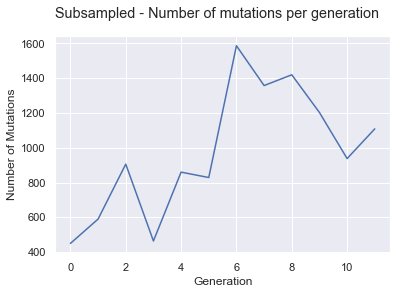

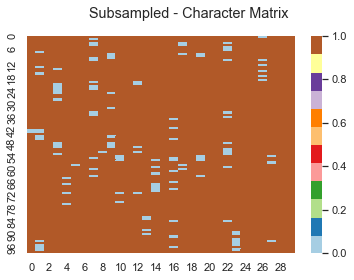

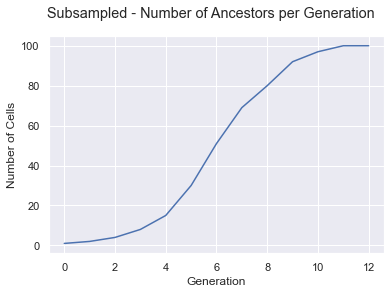

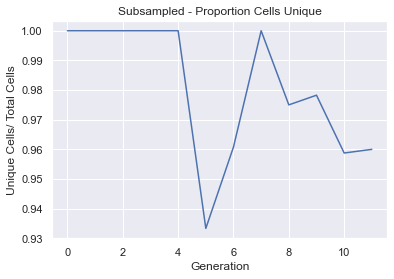

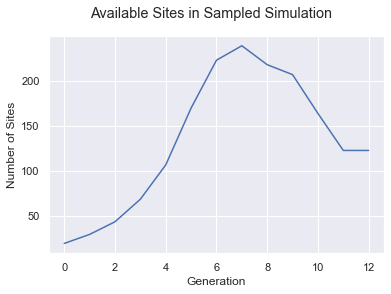

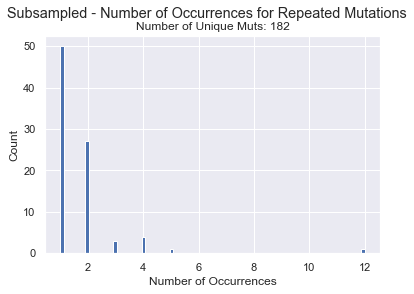

(100, 30)
Time 1: 0.002262115478515625
Compute dictionary: 2.188568115234375
Conflict matrix is symmetric?  True
Total time: 2.189850330352783
Number of true recurrent muts:  86
Number of detected recurrent muts:  163
Number of true recurrent muts not detected: 10 with prevalence [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]


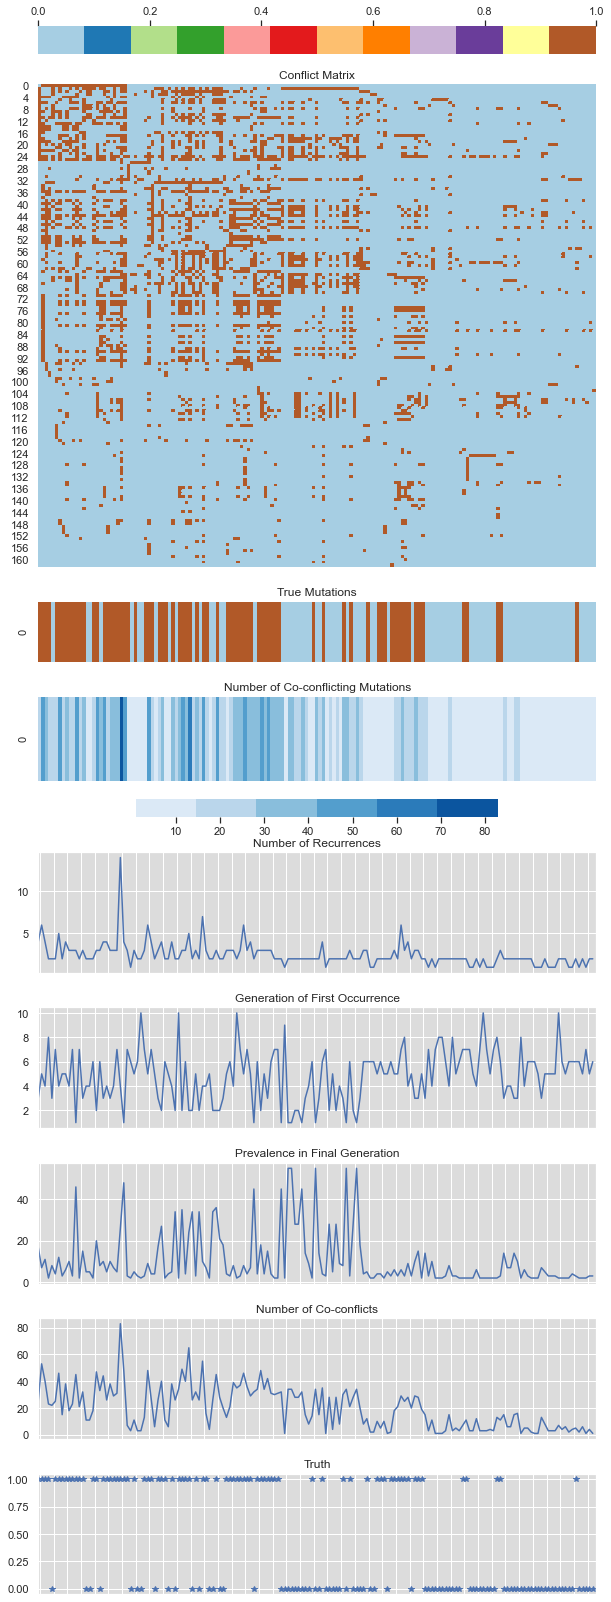

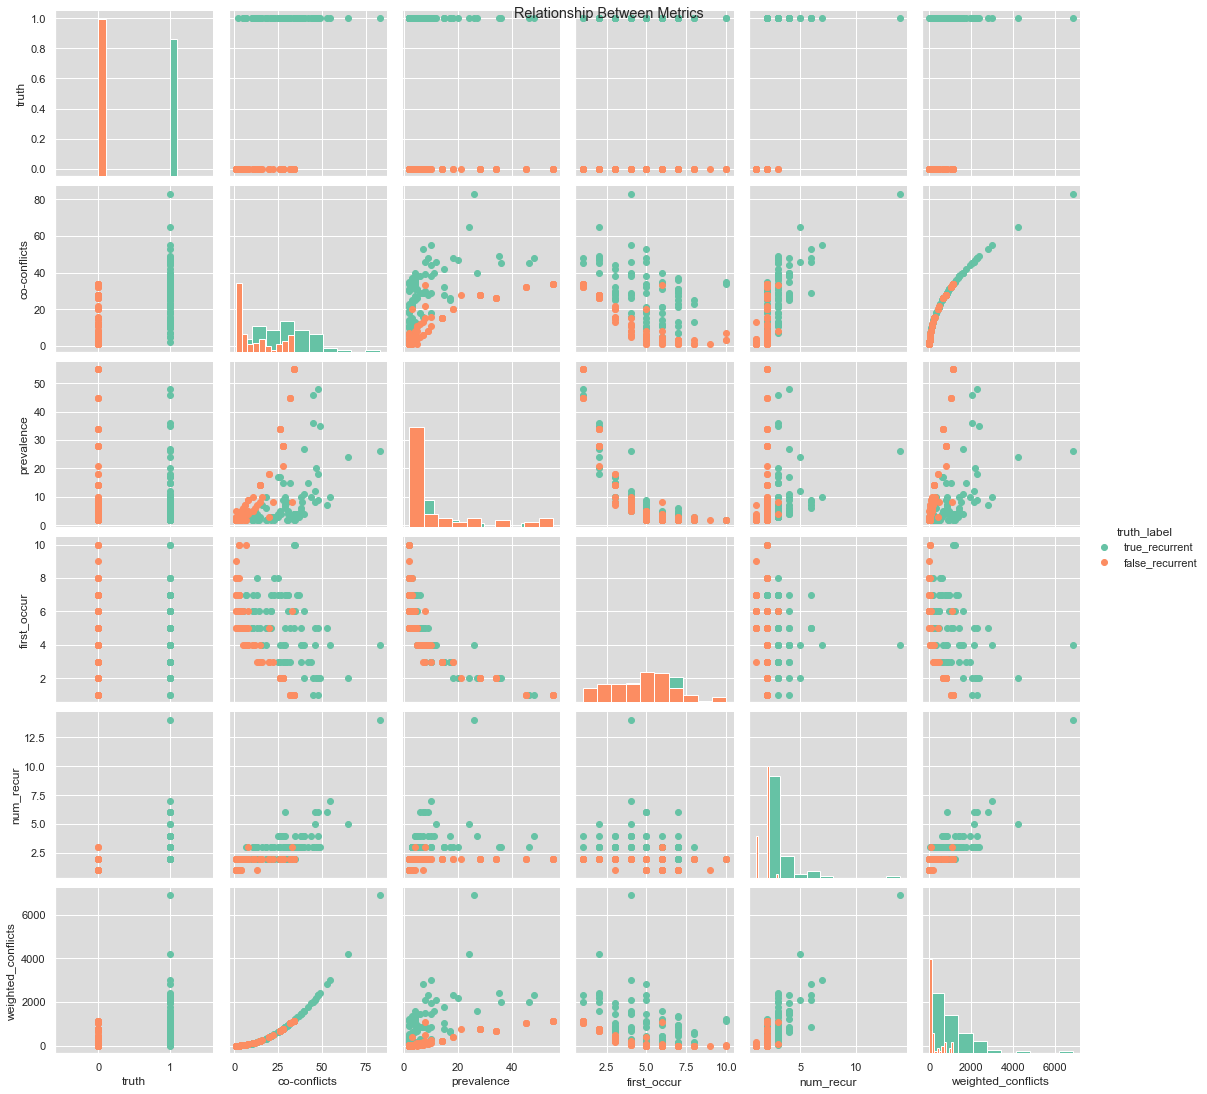

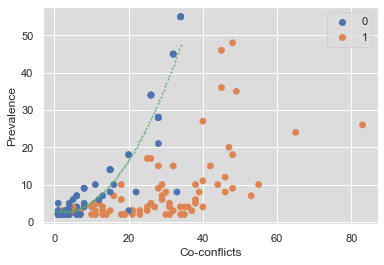

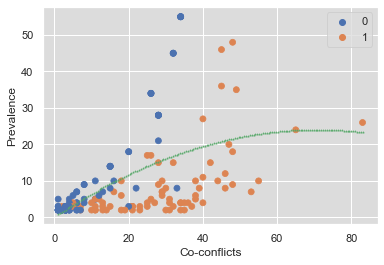

In [9]:
simulation_list = []

for i, list_of_guides in enumerate(lists_of_guides):
    label = labels[i]
    print('Label:', label)

    # Each array has 3-6 targets, we insert ~10 arrays. This gives us 30-60 sites
    site_ix = 0
    target_distributions = {}
    speed = {}
    for guide in list_of_guides:
        dist = indel_distributions[guide]
        try:
            del dist['']
        except KeyError:
            pass
        distvals = np.array(sorted(list(dist.values()), reverse=True))
        distvals = distvals/distvals.sum()
        target_distributions[site_ix] = distvals
        if guide in slow_guides:
            speed[site_ix] = 'slow'
        elif guide in medium_guides:
            speed[site_ix] = 'medium'
        else:
            speed[site_ix] = 'fast'

        site_ix += 1

    num_targets = site_ix 
    num_edit_sites = num_targets * num_arrays

    import itertools
    targets = list(itertools.product(np.arange(num_arrays), np.arange(num_targets)))
    print('List of targets: ', targets)

    deletions = []
    mutation_probs = []
    for array, target in targets:
        deletions.append(target_distributions[target])
        mutation_probs.append(rate[speed[target]])
        
    deletions_probs = pd.DataFrame(deletions)
    deletions_probs = torch.DoubleTensor(deletions_probs.fillna(0.0).values)
    
    # Each edit site has a different mutation probability 
    mutation_probs= np.array(mutation_probs)

    deletions_probs = deletions_probs[:, :100]
    deletions_probs /= deletions_probs.sum(1, keepdims=True)
    
    edit_probs = np.hstack([mutation_probs.reshape(-1,1), (1-mutation_probs.reshape(-1,1))*deletions_probs.numpy()])
    
    
    
    for init_cells in init_cell_list:

        for run in range(num_runs):
            
            simulation = lineageSimulationFast(label, tree_depth, 
                                           num_edit_sites, deletions_probs, 
                                           mutation_probs, edit_probs, init_cells=init_cells, n_subsample=n_subsample)

            try:
                # Summarize results
                # Plot a regression for the non-recurrent mutations
                X = simulation.conflict_matrix.sum(0)
                Y = simulation.prevalence_tape
                ix = np.array(simulation.truth_tape)==0

        #         from sklearn.linear_model import LinearRegression
        #         reg = LinearRegression().fit(X[ix].reshape(-1,1), Y[ix].reshape(-1,1))

                x = X[ix]
                y = Y[ix]

                new_x = np.linspace(min(x), max(x), num=np.size(x))
                coefs = np.polyfit(x,y,2)
                new_line = np.polyval(coefs, new_x)

                plt.figure()
                sns.scatterplot(X, Y, hue=simulation.truth_tape, 
                                cmap='Paired', edgecolor=None,)

                plt.scatter(new_x,new_line,c='g', marker='^', s=1)
                plt.xlabel('Co-conflicts')
                plt.ylabel('Prevalence')
                plt.show()
                plt.close()

                simulation.random_attr['coef'] = coefs


                simulation.random_attr['num_conflict'] = simulation.conflict_matrix.shape[0]

                x = X
                y = Y

                new_x = np.linspace(min(x), max(x), num=np.size(x))
                coefs = np.polyfit(x,y,2)
                new_line = np.polyval(coefs, new_x)

                plt.figure()
                sns.scatterplot(X, Y, hue=simulation.truth_tape, 
                                cmap='Paired', edgecolor=None,)

                plt.scatter(new_x,new_line,c='g', marker='^', s=1)
                plt.xlabel('Co-conflicts')
                plt.ylabel('Prevalence')
                plt.show()
                plt.close()

                simulation.random_attr['full_reg_coef'] = coefs

                simulation_list.append(simulation)
            except:
                print('Recurrent mutations not identified.')


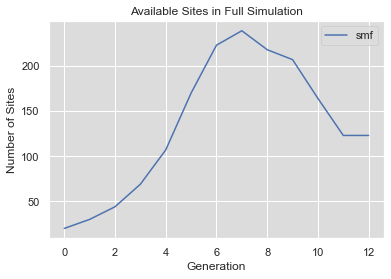

In [10]:
# Plot available sites in full simulation
plt.figure()
for simulation in simulation_list:
    plt.plot(simulation.open_sites, label=simulation.label)
plt.title('Available Sites in Full Simulation')
plt.xlabel('Generation')
plt.ylabel('Number of Sites')
plt.legend()
plt.show()
plt.close()

## Compare Cassiopeia Reconstruction on Our Simulations 

In [11]:
from cassiopeia.TreeSolver.Cassiopeia_Tree import Cassiopeia_Tree
from Cassiopeia.TreeSolver.score_triplets import score_triplets
from Cassiopeia.TreeSolver.Node import Node 
from Cassiopeia.TreeSolver.lineage_solver.lineage_solver import solve_lineage_instance

from hierarchical import cluster_nx

for simulation in simulation_list:
    priors = None
    
    true_network = simulation.true_network
    leaves = [x for x in true_network.nodes() if true_network.out_degree(x)==0]

    if len(leaves) < 4000:
        character_matrix = pd.DataFrame([x.char_vec for x in leaves]).replace('-', np.nan).astype(np.float64)

        names = [x.name for x in leaves]
        character_matrix.index = names 


        cm = pd.DataFrame([x.char_vec for x in leaves]).astype(str)
        cm.index = names 
        cm_uniq = cm.drop_duplicates(inplace=False)
        target_nodes = cm_uniq.values.tolist()
        target_nodes = list(map(lambda x, n: Node(n,x), target_nodes, cm_uniq.index))

        # # Why is the score_triplets not 1??
        base_score = score_triplets(true_network, true_network, number_of_trials = 5000, min_size_depth = 20)
        print('Baseline:', base_score)
        simulation.random_attr['base_score'] = base_score
        
        t = time.time()
        reconstructed_network_greedy = solve_lineage_instance(target_nodes, 
                                                              method="greedy", 
                                                              prior_probabilities=priors)
        cass_time = time.time()-t
        cass_tree = reconstructed_network_greedy[0]
        cass_score = score_triplets(true_network, cass_tree, number_of_trials = 5000, min_size_depth = 20)
        print('Cassiopeia Score: ', cass_score)
        print('Cassiopeia Time: ', cass_time)
        
        simulation.random_attr['cass'] = [cass_tree, cass_score, cass_time]
        
        
        t = time.time()
        new_priors = torch.distributions.Categorical(torch.DoubleTensor(simulation.edit_probs))
        tree, steps = cluster_nx(character_matrix, new_priors)
        our_time = time.time()-t
        
        
        our_tree = Cassiopeia_Tree(method ='simulated', network = tree)
        our_score = score_triplets(true_network, our_tree, number_of_trials = 5000, min_size_depth = 20)
        print('Our Score:', our_score)
        print('Our Time: ', our_time)
        
        simulation.random_attr['our-network'] = tree
        simulation.random_attr['our-score'] = our_score
        simulation.random_attr['our-time'] = our_time
        
        
        
        

ModuleNotFoundError: No module named 'cassiopeia'

In [ ]:
from utilities import convert_nx_to_tree
tree = convert_nx_to_tree(true_network)

In [ ]:
print(tree.ascii_art())

In [ ]:
results = {'init_cells':[], 'cass_time':[], 'cass_score':[],'base_score':[],
          'our_time':[], 'our_score':[]}
for simulation in simulation_list:
    if simulation.label != 'fff':
        continue
    results['init_cells'].append(simulation.init_cells)
    _, cass_score, cass_time = simulation.random_attr['cass']
    results['cass_time'].append(cass_time)
    results['cass_score'].append(cass_score)
    results['our_time'].append(simulation.random_attr['our-time'])
    results['our_score'].append(simulation.random_attr['our-score'])
    results['base_score'].append(simulation.random_attr['base_score'])
    
    

In [ ]:
results = pd.DataFrame(results)
# results.to_csv('Cassiopeia_HierarchiLCA_Comparison.csv')

In [ ]:
sns.set(font_scale=1.5, rc={'figure.figsize':(15,10)})

df = pd.melt(results[['init_cells','cass_score','base_score','our_score']], id_vars='init_cells')
sns.boxplot(x='init_cells',y='value',hue='variable',data=df)
plt.title('Comparison of Greeedy Split with Hierarchical-LCA for Different Starting Cells')
plt.ylabel('Triplets Correct')
plt.xlabel('Initial Cells')
plt.show()

## Missing Data

How does performance change when we are missing data? Analyse only guides with ff since we already do badly in the others... 


In [ ]:
def add_missing_data(df, frac=0.1):
    import random
    ix = [(row, col) for row in range(df.shape[0]) for col in range(df.shape[1])]
    for row, col in random.sample(ix, int(round(frac*len(ix)))):
        df.iat[row, col] = np.nan
    return df 

In [ ]:
fast_simulations = []
for simulation in simulation_list:
    if simulation.label in ['sff','mff','fff']:
        fast_simulations.append(simulation)

In [ ]:
def format_char_vec(a):
    nan_a = np.isnan(a)
    a = a.astype(np.int).astype(str)
    a[nan_a] = '-'
    return list(a)

for simulation in fast_simulations:
    simulation.random_attr['missing_data_expt'] = {'frac':[],'cass':[],'ours':[],'base_score':[]}
    for frac in [0.05, 0.1, 0.2]:
        simulation.random_attr['missing_data_expt']['frac'].append(frac)
        
        priors = None

        cell_record = simulation.get_cell_record()
        # Randomly drop mutations to introduce missingness in data 
        prop = int(cell_record[-1].size * frac)
        #Randomly choose indices of the numpy array:
        i = [random.choice(range(cell_record[-1].shape[0])) for _ in range(prop)]
        j = [random.choice(range(cell_record[-1].shape[1])) for _ in range(prop)]

        cell_record[-1][i,j] = np.NaN
        
        # Modify true network to incorporate missing data 
        import networkx as nx
        from Cassiopeia.TreeSolver.Node import Node

        # Create networkx DiGraph to represent true_tree 
        tree = nx.DiGraph()
        
        # Create nodes representing the leaves
        level_ix = simulation.subsampled_ix
        record = cell_record[-1]
        tips = [Node(str(i), format_char_vec(record[i])) for i in np.arange(len(level_ix))]

        for j in (range(simulation.tree_depth-1, -1, -1)):
            # Map the subsampled cells from the preceding level as parents/children
            parent_ix = level_ix//2
            parent_dict = {}
            record = cell_record[j]

            parent_ix_map = dict(zip(np.unique(parent_ix), np.arange(len(np.unique(parent_ix)))))        

            for i, ix in enumerate(parent_ix):
                # Get record corresponding to parent 
                parent = parent_dict.get(ix, Node(str(ix), format_char_vec(record[parent_ix_map[ix]])))
                parent_dict[ix] = parent
                tree.add_edges_from([(parent, tips[i])])

            # These are the new base layer, and we continue to build upwards
            level_ix = pd.unique(parent_ix)
            tips = [parent_dict[ix] for ix in level_ix]
            
        true_network = tree 
        leaves = [x for x in true_network.nodes() if true_network.out_degree(x)==0]

        character_matrix = pd.DataFrame([x.char_vec for x in leaves]).replace('-', np.nan).astype(np.float64)

        names = [x.name for x in leaves]
        character_matrix.index = names 

        # Cassiopeia takes a string dataframe
        cm = character_matrix.replace(np.nan, -1)
        cm = cm.astype(int).astype(str).replace('-1','-')
        
        cm_uniq = cm.drop_duplicates(inplace=False)
        target_nodes = cm_uniq.values.tolist()
        target_nodes = list(map(lambda x, n: Node(n,x), target_nodes, cm_uniq.index))
        
        # # Why is the score_triplets not 1??
        base_score = score_triplets(true_network, true_network, number_of_trials = 5000, min_size_depth = 20)
        print('Baseline:', base_score)
        
        simulation.random_attr['missing_data_expt']['base_score'].append(base_score)
        
        t = time.time()
        reconstructed_network_greedy = solve_lineage_instance(target_nodes, 
                                                              method="greedy", 
                                                              prior_probabilities=priors)
        cass_time = time.time()-t
        cass_tree = reconstructed_network_greedy[0]
        cass_score = score_triplets(true_network, cass_tree, number_of_trials = 5000, min_size_depth = 20)
        print('Cassiopeia Score: ', cass_score)
        print('Cassiopeia Time: ', cass_time)

        cass = [cass_tree, cass_score, cass_time]
        simulation.random_attr['missing_data_expt']['cass'].append(cass)
        

        t = time.time()
        new_priors = torch.distributions.Categorical(torch.DoubleTensor(simulation.edit_probs))
        tree, steps = cluster_nx(character_matrix, new_priors)
        our_time = time.time()-t


        our_tree = Cassiopeia_Tree(method ='simulated', network = tree)
        our_score = score_triplets(true_network, our_tree, number_of_trials = 5000, min_size_depth = 20)
        print('Our Score:', our_score)
        print('Our Time: ', our_time)
        
        ours = [our_tree, our_score, our_time]
        simulation.random_attr['missing_data_expt']['ours'].append(ours)
        
        



In [ ]:
results = {'guide':[], 'cass_score_delta':[],'base_score_delta':[],
          'our_score_delta':[], 'frac_missing':[]}
for simulation in fast_simulations:
    if simulation.label = 'fff':
        
        _, cass_score, cass_time = simulation.random_attr['cass']
        our_score = simulation.random_attr['our-score']
        base_score = simulation.random_attr['base_score']

        # Add results from experiments with data missing
        cass_delta = [x[1]-cass_score for x in simulation.random_attr['missing_data_expt']['cass']]
        our_delta = [x[1]-our_score for x in simulation.random_attr['missing_data_expt']['ours']]
        base_delta = [x-base_score for x in simulation.random_attr['missing_data_expt']['base_score']]

        results['cass_score_delta'] += cass_delta
        results['our_score_delta'] += our_delta
        results['base_score_delta'] += base_delta
        results['frac_missing'] += simulation.random_attr['missing_data_expt']['frac'] 

        results['init_cells'] += [simulation.label]*len(base_delta)

In [ ]:
results = pd.DataFrame(results)

In [ ]:
sns.set(font_scale=1.5, rc={'figure.figsize':(15,10)})

df = pd.melt(results[['cass_score_delta','base_score_delta','our_score_delta','frac_missing']], id_vars='frac_missing')
sns.boxplot(x='frac_missing',y='value',hue='variable',data=df)
plt.title('Performance Change with Missing Data over -ff Guides')
plt.ylabel('Triplets Correct')
plt.xlabel('Fraction Missing')
plt.show()

## Comparison using our metric


In [ ]:
def get_ordering(tree, n1, n2, n3):
    """
    Return the node that is furthest phylogenetically from the others.
    e.g. If (a,b),c is the true ordering, return c
    
    The lca of (a,c) and (b,c) will the same.
    """
    if tree.lca([n1, n2]) == tree.lca([n1, n3]):
        return n1
    if tree.lca([n1, n2]) == tree.lca([n2, n3]):
        return n2
    if tree.lca([n1, n3]) == tree.lca([n2, n3]):
        return n3

def triplets_correct(true_tree, rtree, n_samples=10):
    
    n_correct = 0
    for i in range(n_samples):
        # Sample a triplet of cells 
        ix = np.random.choice([x.name for x in true_tree.tips()],3,replace=False)
        n1, n2, n3 = ix

        true = get_ordering(true_tree, n1,n2,n3)
        furthest = get_ordering(rtree, n1, n2,n3)
        
        if furthest == true:
            n_correct += 1
            
    n_correct /= n_samples

    return n_correct


In [ ]:
target_nodes

In [ ]:
cass_network = simulation.random_attr['cass'][0].network
[x.name for x in cass_network.nodes()]

In [ ]:
triplets_correct(true_tree, cass_tree)

In [ ]:
from utilities import convert_nx_to_tree

results = {'init_cells':[], 'cass_score':[],'base_score':[],
          'our_score':[]}
for simulation in simulation_list:
    
    results['init_cells'].append(simulation.init_cells)
    cass_tree, _, _ = simulation.random_attr['cass']
    
    # Recover TreeNode object from network
    
    true_tree = convert_nx_to_tree(simulation.get_sampled_network())
    cass_tree = convert_nx_to_tree(cass_tree.network)
    our_tree = convert_nx_to_tree(simulation.random_attr['our-network'] )
    
    break 
    
    # Compute our triplets correct
    
    results['cass_score'].append(cass_score)
    results['our_score'].append(simulation.random_attr['our-score'])
    results['base_score'].append(simulation.random_attr['base_score'])
    
    

## Tree Reconstruction - NJ

In [ ]:
def compare(simulation, entries=None):
    from scipy.spatial.distance import pdist, squareform

    if entries is None:
        entries = simulation.feature_matrix.index.values
    entries = list(reversed(entries))
    x = []
    for e in entries:
        if e < simulation.feature_matrix.shape[0]:
            x.append(simulation.feature_matrix.iloc[e].values)
        else:
            x.append(simulation.random_attr['steps']['lcas'][e])

    
    from plotly.subplots import make_subplots
    import plotly.graph_objects as go

    fig = make_subplots(rows=2, cols=1, subplot_titles=("Character Matrix", "P(Indel)"), row_heights=[0.9,0.1], shared_xaxes=True)

    fig.append_trace(go.Heatmap(z=x,  colorscale = 'gray', y=['node-'+str(t) for t in entries]), row=1, col=1)
    fig.append_trace(go.Heatmap(z=[simulation.random_attr['prob_indels'].reshape(-1)]), row=2, col=1)

    fig.update_layout(height=800, width=1000, title_text="Comparison of Accumulated Indels")
    fig.show()

    # Also show a heatmap of the distances (with and without log probs) 
    logD = pdist(x, lambda u,v: (- (u + v - 2*u*v) * np.log(simulation.random_attr['prob_indels'].reshape(-1))).sum())
    
    plt.figure(figsize=(10,10))
    sns.heatmap(squareform(logD), yticklabels=entries,cmap='coolwarm')
    plt.title('Logprob distance between nodes')
    plt.show()
    plt.close()
    
    D = pdist(x, 'hamming')
    
    plt.figure(figsize=(10,10))
    sns.heatmap(squareform(D), yticklabels=entries,cmap='coolwarm')
    plt.title('Hamming distance between nodes')
    plt.show()
    plt.close()
    
    return logD, D, entries


def compute_accuracy(r1, r2):
        t1, t2 = [], []
        t1_labels, t2_labels = [], []

        r1_kids, r2_kids = [None, None],  [None, None]
        for i, child in enumerate(r1.children):
            leaves = [x.name for x in child.tips()] 
            t1 += leaves
            t1_labels += [i]*len(leaves)
            r1_kids[i] = child

        r1_kids = [None, None]
        for i, child in enumerate(r2.children):
            leaves = [x.name for x in child.tips()] 
            t2 += leaves
            t2_labels += [i]*len(leaves)
            r2_kids[i] = child

        t1_true = dict(zip(t1, t1_labels))
        t2_true = dict(zip(t2, t2_labels))

        acc = 0
        for n in t1:
            acc += (t1_true[n] == t2_true[n])

        acc /= len(t1)
        if acc < 0.5:
            return 1-acc, r1_kids, list(reversed(r2_kids))
        else:
            return acc, r1_kids, r2_kids

def tips(node):
    if node is None:
        return []
    else:
        return [x.name for x in node.tips()]

def why_are_trees_bad(simulation, mod_tree, steps):
    
    r1 = simulation.true_tree.root()
    r2 = mod_tree.root()

    # Go breadth-first down the tree 
    queue1 = [r1]
    queue2 = [r2]


    next_queue1 = []
    next_queue2 = []


    level = 0 
    for i in range(10):

        next_queue1 = [None]*(2*len(queue1))
        next_queue2 = [None]*(2*len(queue1))

        level += 1 
        print('----------------------------------------------------')
        print('Level: {0}'.format(level))
        print(len(queue1))
        for i, r1 in enumerate(queue1):
            r2 = queue2[i]


            # Check how good the split is at this level: 

            if r1 and r2:
                acc, r1_children, r2_children = compute_accuracy(r1, r2)

                print('Accuracy:', acc)
            else:
                print('r1 or r2 is None')


            if acc < 1:

                lcas = pd.DataFrame([steps['lcas'][int(r2.children[1].name)], steps['lcas'][int(r2.children[0].name)]])
                lcas.columns = simulation.feature_matrix.columns 

                num_sites = simulation.cell_record[0].shape[1]
                original = []
                for site_num in range(num_sites):
                    x = simulation.feature_matrix.columns[simulation.feature_matrix.columns<(site_num+1)*1000]
                    x = x[x>site_num*1000]

                    original.append((lcas[x]*(x-site_num*1000)).sum(1).values)

                original = np.array(original).T    

                plt.figure()
                xx = pd.DataFrame(simulation.cell_record[1]).values
                sns.heatmap([original.reshape(-1), xx.reshape(-1)], cmap='Paired')
                plt.title('Inferred, True Cell States')
                plt.show()
                plt.close()


                raise(Exception('Errors splitting tree at level {0}, got accuracy {1}'.format(level, acc)))

            next_queue1[2*i] = r1_children[0]
            next_queue1[2*i+1] = r1_children[1]

            next_queue2[2*i] = r2_children[0]
            next_queue2[2*i+1] = r2_children[1]


        queue1 = next_queue1
        queue2 = next_queue2

        next_queue1 = []
        next_queue2 = []


## Benchmark against vanilla hierarchical clustering 

In [ ]:
import time
import sys

toolbar_width = 40

# setup toolbar
sys.stdout.write("[%s]" % (" " * toolbar_width))
sys.stdout.flush()
sys.stdout.write("\b" * (toolbar_width+1)) # return to start of line, after '['

for i in range(toolbar_width):
    time.sleep(0.1) # do real work here
    # update the bar
    sys.stdout.write("-")
    sys.stdout.flush()

sys.stdout.write("]\n") # this ends the progress bar

In [ ]:
def vanilla_hierarchical(fm, prob_features):

    logD = pdist(fm, lambda u,v: (- (u + v - 2*u*v) * np.log(prob_features.reshape(-1))).sum())

    from skbio.tree import TreeNode
    from scipy.cluster.hierarchy import linkage

    entries = fm.index.values
    hier_tree = TreeNode.from_linkage_matrix(linkage(logD), [''+str(i) for i in entries])

    return hier_tree
                 

In [ ]:
import hierarchical
importlib.reload(hierarchical)
import hierarchical

import modified_nj
importlib.reload(modified_nj)
import modified_nj


import time 

times = {}
accs = {}
cluster_fns = {'lca_hier': lambda x,y: hierarchical.cluster(x,y), 
               'nj': lambda x,y : modified_nj.mod_nj(x,y),
               'hier': lambda x,y : vanilla_hierarchical(x,y)
              }


for experiment in ['nj','hier','lca_hier']:
    print('\n> Experiment: ',experiment, '\n \n')
    times[experiment] = []
    accs[experiment] = []
        
    for simulation in simulation_list:
        
        if simulation.init_cells > 1:
            continue
        
        cluster_fn = cluster_fns[experiment]

        fm = simulation.get_feature_matrix()

        dels_probs = simulation.get_edit_probs()
        prob_features = dels_probs[fm.columns].values

        simulation.random_attr['prob_indels'] = prob_features

        s = time.time()
        tree, steps = cluster_fn(simulation.feature_matrix, prob_features)
        times[experiment].append(time.time()-s)
        print(experiment+' time:', time.time()-s)

        from triplets_correct import triplets_correct
        try:
            trees, acc = triplets_correct(simulation, inferred_trees={'nj':tree}, n_samples=1000)
            accs[experiment].append(acc['nj'])
            print('Triplets correct: ', acc)
        except Exception as e:
            print('Error: ',e)
        simulation.random_attr[experiment+'_tree'] = tree
        simulation.random_attr[experiment+'_steps'] = steps 


In [ ]:
# x = pd.DataFrame(accs)
# x['init_cells'] = [simulation.init_cells for simulation in simulation_list]
pd.melt(x)

In [ ]:
vals  = pd.melt(x)
sns.boxplot(x='variable', y='value', hue =init_cellsdata=vals)
plt.xlabel('Clustering Method')
plt.ylabel('Triplets Correct')
plt.show()

In [ ]:
trees, acc = triplets_correct(simulation, inferred_trees={'nj':tree}, n_samples=1000)

In [ ]:
simulation.random_attr['nj_tree'].root().children 

TreeNode(name=)

In [ ]:
import modified_nj
importlib.reload(modified_nj)
import modified_nj

import time 
    
ourtimes = []
ouraccs = []

for simulation in simulation_list:
    fm = simulation.get_feature_matrix()

    dels_probs = simulation.get_edit_probs()
    # Try without weighted 
    dels_probs[dels_probs!=0] = np.exp(1)
    
    prob_features = dels_probs[fm.columns].values

    
    s = time.time()
    mod_tree, steps = modified_nj.mod_nj(simulation.feature_matrix.values, prob_features)
    ourtimes.append(time.time()-s)
    print('NJ Time:', time.time()-s)
    
#     print(mod_tree.ascii_art())
    
    from triplets_correct import triplets_correct
    trees, acc = triplets_correct(simulation, inferred_trees={'nj':mod_tree}, n_samples=1000)
    ouraccs.append(acc['nj'])
    print('Triplets correct: ', acc)
    
    simulation.random_attr['unwt_tree'] = mod_tree
    
    simulation.random_attr['unwt_steps'] = steps
    try:
        why_are_trees_bad(simulation, mod_tree, steps)
    except Exception as e:
        print(e)

In [ ]:
for simulation in simulation_list:
    
    print('New Simulation: ')
    mod_tree = simulation.random_attr['tree']
    steps = simulation.random_attr['steps']
    left_tree = simulation.true_tree.root().children[0]
    right_tree = simulation.true_tree.root().children[1]

    left_tree = [x.name for x in left_tree.tips()]
    right_tree = [x.name for x in right_tree.tips()]

    side = {}

    bad_joins = []

    for i, join in enumerate(steps['joins']):

        # Determine which half of the tree the nodes lie in 
        for n1 in join:
            # See if n1 and n2 are both in the left 
            if str(n1) in left_tree:
                side[str(n1)] = 'L'
 
            elif str(n1) in right_tree:
                side[str(n1)] = 'R'
            else:
                # This is an internal node, look at its children
                child = mod_tree.find(str(n1)).children[0].name
                side[str(n1)] = side[child]

        n1, n2 = join

        if side[str(n1)] != side[str(n2)]:
            print('BAD JOIN: {0} AFTER {1}/{2} STEPS.'.format(join, i, len(steps['joins'])))
            bad_joins.append(join)

    def get_mut_prof(simulation, tree, node_name):
        if int(node_name) > 1000:
            c1, c2 = mod_tree.find(str(node_name)).children
            c1, c2 = c1.name, c2.name
            return get_mut_prof(simulation, tree, c1) * get_mut_prof(simulation, tree,c2)
        else:
            return simulation.feature_matrix.iloc[int(node_name)].values        

    for join in bad_joins:
        n1,n2 = join
        v1, v2 = int(n1), int(n2)

        print('Looking at: ', n1, n2)

        v1 = get_mut_prof(simulation, mod_tree, n1)
        v2 = get_mut_prof(simulation, mod_tree, n2)

        sns.heatmap([v1,v2], cmap='Paired')
        plt.show()
        plt.close()
        
        delprobs = simulation.get_edit_probs()[simulation.feature_matrix.columns].values.reshape(-1)
        
        plt.figure(figsize=(10,10))
        sns.heatmap([delprobs,v1,v2,delprobs], cmap='BuGn_r')
        plt.show()
        plt.close()
        
        # What are the probs of those edits?
        plt.show()

In [ ]:
for simulation in simulation_list:
    
    print('New Simulation: ')
    mod_tree = simulation.random_attr['tree']
    steps = simulation.random_attr['steps']
    left_tree = simulation.true_tree.root().children[0]
    right_tree = simulation.true_tree.root().children[1]

    left_tree = [x.name for x in left_tree.tips()]
    right_tree = [x.name for x in right_tree.tips()]

    side = {}

    bad_joins = []

    for i, join in enumerate(steps['joins']):

        # Determine which half of the tree the nodes lie in 
        for n1 in join:
            # See if n1 and n2 are both in the left 
            if str(n1) in left_tree:
                side[str(n1)] = 'L'

            elif str(n1) in right_tree:
                side[str(n1)] = 'R'
            else:
                # This is an internal node, look at its children
                child = mod_tree.find(str(n1)).children[0].name
                side[str(n1)] = side[child]

        n1, n2 = join

        if side[str(n1)] != side[str(n2)]:
            print('BAD JOIN: {0} AFTER {1}/{2} STEPS.'.format(join, i, len(steps['joins'])))
            bad_joins.append(join)

    def get_mut_prof(simulation, tree, node_name):
        if int(node_name) > 1000:
            c1, c2 = mod_tree.find(str(node_name)).children
            c1, c2 = c1.name, c2.name
            return get_mut_prof(simulation, tree, c1) * get_mut_prof(simulation, tree,c2)
        else:
            return simulation.feature_matrix.iloc[int(node_name)].values        

    for join in bad_joins:
        n1,n2 = join
        v1, v2 = int(n1), int(n2)

        print('Looking at: ', n1, n2)

        v1 = get_mut_prof(simulation, mod_tree, n1)
        v2 = get_mut_prof(simulation, mod_tree, n2)

        sns.heatmap([v1,v2], cmap='Paired')
        plt.show()
        plt.close()
        
        delprobs = simulation.get_edit_probs()[simulation.feature_matrix.columns].values.reshape(-1)
        
        plt.figure(figsize=(10,10))
        sns.heatmap([delprobs,v1,v2,delprobs], cmap='BuGn_r')
        plt.show()
        plt.close()
        
        # What are the probs of those edits?
        plt.show()

In [ ]:
theirtimes = []
theiraccs = []
for simulation in simulation_list:
    fm = simulation.get_feature_matrix()
    
    t = time.time()
    data = sklearn.metrics.pairwise_distances(fm.values, metric='hamming')
    dm = DistanceMatrix(data)

    norm_tree = nj(dm)
    
    theirtimes.append(time.time()-t)
    print('NJ Time:', time.time()-t)
    
    from triplets_correct import triplets_correct
    trees, acc = triplets_correct(simulation, inferred_trees={'nj':norm_tree}, n_samples=1000)
    theiraccs.append(acc['nj'])
    
    simulation.random_attr['nj_tree'] = norm_tree
    
    print('Triplets correct: ', acc['nj'])
    
        
    

In [ ]:
norm_tree.root().children

In [ ]:
t1 = []
t1_labels = []

r1_kids, r2_kids = [None, None],  [None, None]
for i, child in enumerate(r1.children):
    leaves = [x.name for x in child.tips()] 
    t1 += leaves
    t1_labels += [i]*len(leaves)
    r1_kids[i] = child

In [ ]:
sns.set(font_scale=2)
plt.figure(figsize=(15,15))
sns.boxplot(x='label', y='time (s)', hue='method', data=df, palette='Set1')

In [ ]:
sns.set(font_scale=2)
plt.figure(figsize=(15,15))
sns.boxplot(x='label', y='acc', hue='method', data=df, palette='Set1')

In [ ]:
for g in range(1): #tree_depth):
    num_recurring = []

    for simulation in simulation_list:
        subsampled_edits = simulation.get_edit_record()
        subsampled_record = simulation.get_cell_record()


        # Investigating number of singletons, recurrent mutations and 'good' mutations 
        recurring_edits = {} # Mapping (site, deletion) to a list of generations where the mutation reoccured. 
        gen_occurred = {}
        for gen in range(simulation.tree_depth):
            rows, cols = np.where(subsampled_edits[gen]!=0)
            edits = subsampled_edits[gen][np.where(subsampled_edits[gen]!=0)]
            for col, edit in zip(cols, edits):
                # Track the generation that each mutation occurred
                gen_occurred[(col,edit)] = gen_occurred.get((col, edit), []) + [gen]
                # Track only recurrent mutations
                if ((subsampled_record[gen - 1 ][:, col] == edit).sum()) > 0:
                    # Add this (position, deletion) pair to the list of recurring muts
                    recurring_edits[(col, edit)] = recurring_edits.get((col, edit), []) + [gen]

        true = len(set(recurring_edits.keys()))

#         true = simulation.get_open_sites()[g]
#         num_recurring.append(true/simulation.feature_matrix.shape[1])
        num_recurring.append(np.mean(simulation.compute_unique_cells()[1:]))

    r, _ = pearsonr(num_recurring, ouraccs)
    plt.figure(figsize=(5,5))
    plt.ylabel('Accuracy')
    plt.scatter(num_recurring, ouraccs)
    plt.xlabel('Mean # Unique Cells \n r: {0:2f}'.format(r))
    plt.show()
    plt.close()

In [ ]:
len(list(mod_tree.children[0].tips()))

In [ ]:
len(list(mod_tree.children[1].tips()))

In [ ]:
from scipy.stats import pearsonr 

In [ ]:
sns.set_palette('Set1')

## After removing recurrent mutations

In [ ]:
ourtimes_no_recur = []
ouraccs_no_recur = []

for simulation in simulation_list:
    ignore = []
    for site, m in simulation.conflicting_muts:
        ignore.append(int(site*1000+m))
     
    fm = simulation.get_feature_matrix()
    print('Dropping {0} mutations from {1}.'.format(len(ignore), fm.shape[1]) )
    
    fm = fm.drop(ignore, axis=1)

    dels_probs = simulation.get_edit_probs()
    prob_features = dels_probs[fm.columns].values

    display(dels_probs[fm.columns])

    s = time.time()
    mod_tree, steps = modified_nj.mod_nj(fm.values, prob_features)
    ourtimes_no_recur.append(time.time()-s)
    print('NJ Time:', time.time()-s)
    
#     print(mod_tree.ascii_art())
    
    from triplets_correct import triplets_correct
    trees, acc = triplets_correct(simulation, inferred_trees={'nj':mod_tree}, n_samples=1000)
    ouraccs_no_recur.append(acc['nj'])
    print('Triplets correct: ', acc)
    
    


In [ ]:
df = {'time (s)': ourtimes+ourtimes_no_recur, 'acc':ouraccs+ouraccs_no_recur, 'method':['with recur']*len(simulation_list)+['no_recur']*len(simulation_list), 
      'label':[simulation.label for simulation in simulation_list]+[simulation.label for simulation in simulation_list]}

df = pd.DataFrame(df)
df

In [ ]:
sns.set(font_scale=2)
plt.figure(figsize=(15,15))
sns.boxplot(x='label', y='acc', hue='method', data=df, palette='Set1')

In [ ]:
len(simulation.truth_tape)

In [ ]:
len(simulation.conflicting_muts)

In [ ]:
ourtimes_no_recur_true = []
ouraccs_no_recur_true = []

for simulation in simulation_list:
    ignore = []
    true_recur = np.array(simulation.conflicting_muts)[np.array(simulation.truth_tape)==1]
    for site, m in true_recur:
        ignore.append(int(site*1000+m))
     
    fm = simulation.get_feature_matrix()
    print('Dropping {0} mutations from {1}.'.format(len(ignore), fm.shape[1]) )
    
    fm = fm.drop(ignore, axis=1)

    dels_probs = simulation.get_edit_probs()
    prob_features = dels_probs[fm.columns].values

    display(dels_probs[fm.columns])

    s = time.time()
    mod_tree, steps = modified_nj.mod_nj(fm.values, prob_features)
    ourtimes_no_recur_true.append(time.time()-s)
    print('NJ Time:', time.time()-s)
    
#     print(mod_tree.ascii_art())
    
    from triplets_correct import triplets_correct
    trees, acc = triplets_correct(simulation, inferred_trees={'nj':mod_tree}, n_samples=1000)
    ouraccs_no_recur_true.append(acc['nj'])
    print('Triplets correct: ', acc)
    
    
